# Import libraries 

In [1]:
#Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text cleaning
import re, string
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec


from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


import sklearn
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import nltk
import scapy
import re
import warnings
import gensim
os.environ['KMP_DUPLICATE_LIB_OK']='True'
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from textblob import TextBlob
from sklearn.model_selection import train_test_split
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mido_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<Figure size 640x480 with 0 Axes>

# Check GPU

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [3]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

NVIDIA GeForce GTX 1060
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


# import data

In [4]:
df = pd.read_csv("BRAD.tsv",sep='\t')
df.columns = ['label' , 'ID1' , 'ID2' , 'ID3' , 'sentence']
cleaned = df.drop(['ID1' , 'ID2' , 'ID3'], axis=1)
cleaned.head()

,label,sentence
0,5,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,4,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,5,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,3,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,4,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [5]:
def mark_sentiment(rating):
    if(rating<3):
        return 0
    elif (rating == 3):
        return 1
    else:
        return 2

In [6]:
cleaned['label'] = cleaned['label'].apply(lambda x:mark_sentiment(x))
cleaned.head()

,label,sentence
0,2,كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله و...
1,2,رواية تلامس الروح بعمقها، فخورة اني اخيرا لقيت...
2,2,رواية محكمة بكل اختصار. وكان الجزء المفضل بالن...
3,1,هذا الكتاب يحزن مرا، ظلم واضطهاد عيسى بلا ذنب ...
4,2,رواية واقعية ورائعة تمثل أحداث تكررت كثيرا في ...


In [7]:
cleaned.label.value_counts()

2    325433
1    106785
0     78380
Name: label, dtype: int64

In [8]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","كان","ّأيّان"}

In [9]:
st = ISRIStemmer()
def stemNLTK(text):
    # tokenize
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ty = st.stem(w)
        cleaned.append(ty)
    return " ".join(cleaned)

stemNLTK("كتاب رائع. اعتقد ان الروايه كلها تلخصت بجمله ")

'كتب رئع عقد ان ريه كله لخص جمل'

In [10]:
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

normalizeArabic("مَرَّتْ أوَانَ العِيدِ بَيْنَ نَوَاهِدٍ مِثْلِ الشُّمُوسِ لِحَاظُهُنَّ ظِبَاء")

'مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء'

In [11]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

remove_stop_words("مرت اوان العيد بين نواهد مثل الشموس لحاظهن ظباء")

'مرت اوان العيد نواهد الشموس لحاظهن ظباء'

In [12]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    text = re.sub("\d+", " ", text)
    ## Remove Tashkeel
    text = normalizeArabic(text)
    #text = re.sub('\W+', ' ', text)
    text = re.sub('[A-Za-z]+',' ',text)
    text = re.sub(r'\\u[A-Za-z0-9\\]+',' ',text)
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    #Stemming
    text = stemNLTK(text)
    return text

In [13]:
%time
cleaned['sentence'] = cleaned['sentence'].apply(lambda x:clean_text(x))
cleaned.head()

Wall time: 0 ns


,label,sentence
0,2,كتب رءع عقد ريه كله لخص جمل وحد عطء حب قيم
1,2,ريه لمس روح عمق فخر اني اخر لقت ريه عرب كتب به...
2,2,ريه حكم بكل خصر جزء فضل نسب وصف كتب حيه عيس فل...
3,1,كتب يحز مرا ظلم ضطهاد عيس بلا ذنب فصل كتب خلف ...
4,2,ريه وقع رءع مثل حدث كرر جمع خلج ونا تثر لني عش...


In [14]:
cleaned['sentence'].duplicated().sum()

15022

In [15]:
cleaned.drop_duplicates("sentence", inplace=True)
data = cleaned

# Calculate Length of sentence and preprocessing

In [16]:
text_len = []
for text in data.sentence:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
data['text_len'] = text_len

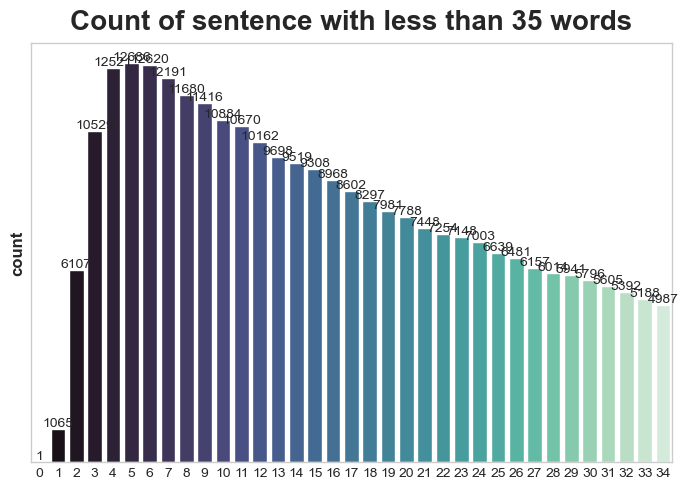

In [17]:
plt.figure(figsize=(7,5))

ax = sns.countplot(x='text_len', data=data[data['text_len'] < 35 ], palette='mako')
plt.title('Count of sentence with less than 35 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [18]:
data = data[data['text_len'] > 1]

In [19]:
data.sort_values(by=['text_len'], ascending=False)

,label,sentence,text_len
58006,2,جرم فعل جمع صدقاء عصم وسف جمل روي الل قرت بجد ...,1204
501177,0,عقد غلط طبع اسم فرض يبق اسم فرق نجي عطا الل لل...,1202
68388,2,ولد حرت ارخ بشر خلق قدم بدي انا كنت سمع قصه دي...,1172
119987,2,لحم حرافيش نجب حفظ عشر نجي خرج الي حره ظلم وعد...,1160
257072,2,عسل اتم غلف كتب قرء لهم ودا الل حصل فعل حسه اد...,1147
...,...,...,...
103474,2,جمل رهق,2
103444,2,حله صعب,2
103426,1,الم الم,2
103394,2,بسط خراف,2


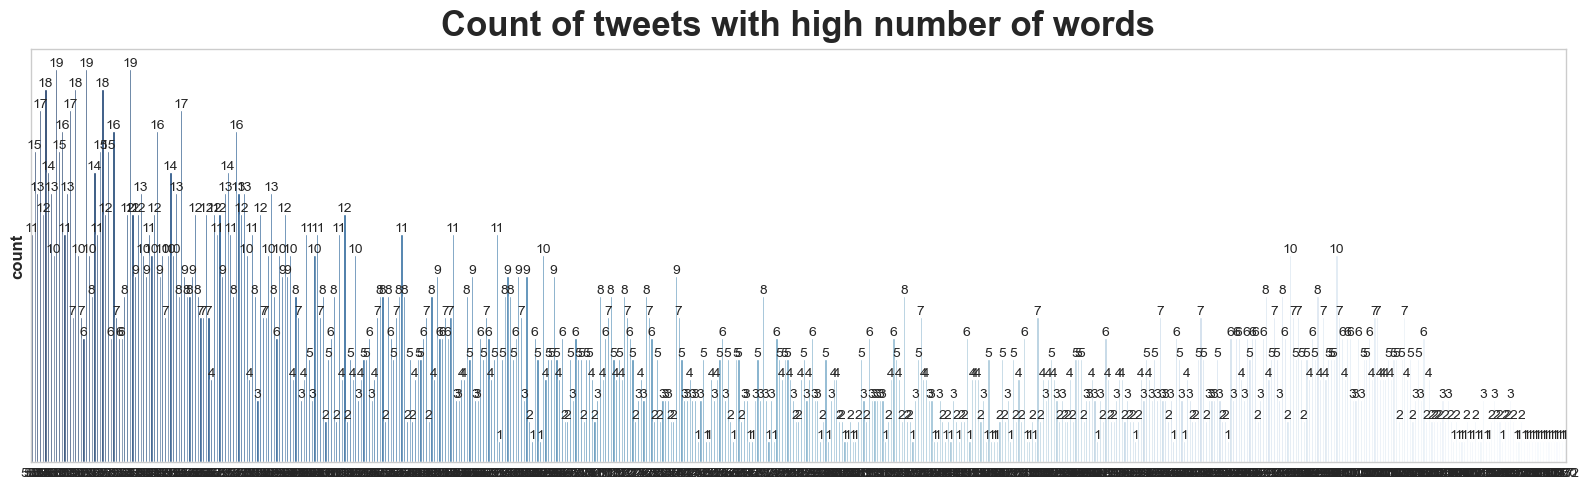

In [20]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='text_len', data=data[(data['text_len']<=1200) & (data['text_len']>500)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [21]:
data = data[data['text_len'] < 100]

In [22]:
max_len = np.max(data['text_len'])
max_len 

99

In [23]:
data.label.value_counts()

2    268628
1     90333
0     67422
Name: label, dtype: int64

In [24]:
data.sort_values(by=["text_len"], ascending=False)

,label,sentence,text_len
347753,2,حسن ابد عرق اجد تخبط محاولاتي كتب رجع ريه بطل ...,99
499634,2,بحب رجل شعر داء انن امل شء تجد داء شكل كتب خوف...,99
118228,2,هذاالكتاب اعد ذكر ورء جمع حدث مر كتب سوء رحل س...,99
118261,2,عنو صدم لمن فهم غيت ولم فهم سوء عكس صدق توقع ط...,99
336455,2,غزل بنت اسم لفت لذذ جدا ذكر بدر شوك نعم بلذ وخ...,99
...,...,...,...
22695,2,كتب اهب,2
22702,2,تسم ريه,2
147077,2,متع خرف,2
60832,2,رءع نصف,2


# Balancing Data Classes

In [25]:
data.label.value_counts()

2    268628
1     90333
0     67422
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

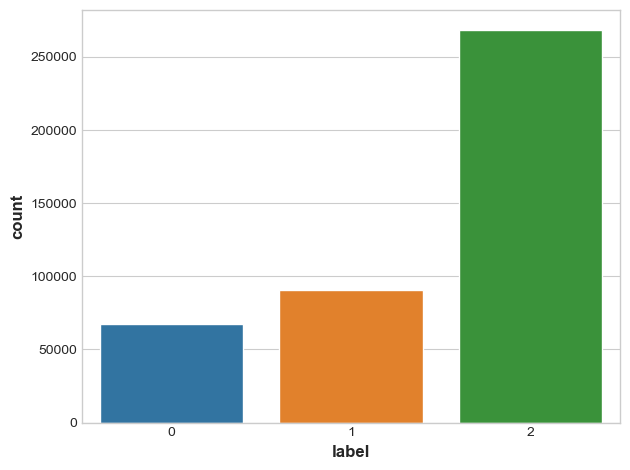

In [26]:
sns.countplot(x=data["label"])

In [27]:
#datasetNeg , datasetBal , datasetPos, = (g for _,g in data.groupby('label'))
#datasetPos = datasetPos.iloc[(268628 -67422 ) : ]
#datasetBal = datasetBal.iloc[(90333 -67422 ) : ]
#data = pd.concat([datasetPos,datasetBal,datasetNeg])
#data.label.value_counts()

In [28]:
#sns.countplot(x=data["label"])

# Train and test and validation splitting

In [29]:
X = data['sentence']
y = data['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [32]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[     0,  48544],
       [     1,  65039],
       [     2, 193412]], dtype=int64)

# PyTorch Bi-LSTM RNN

In [33]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w : i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return vocab_to_int, features

In [34]:
vocabulary, tokenized_column = Tokenize(data["sentence"], max_len)

In [35]:
data["sentence"].iloc[10]

'ريه رءع ورق تبد سءل ريه ترجم كتب عرب حير تحث كمل قرء تجد فسر تغص علم بكل حسك تنس حير الي ضيع عيس ولي هوز الي ارض ميندوز الي كوت جنه قلت عنه جوزف يرا هوز كنت اتم انت نصر عيس وليس هوز كنت شفق مثل وجد نفس لعن جمع حتي يءذ اذن يمن الل كبر الل كبر ذنب نمي الي مثل عءل طرف اخر كمل قرء ذكر حير صفح اول لجد رجع اليها اقر مره اخر لقل نفس ضحك كتب هه'

In [36]:
tokenized_column[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    2,   10,  399,  756,  130,    2,
        806,    1,   62,  925, 3882,   70,    4,  390,  540, 2431,    9,
        141, 4633,  968,  925,  132,  705,  842,  791, 2128,  132,  248,
       4936,  132,  873,  939,  602,  105, 8528, 2019, 2128,   34,  304,
        339,  298,  842,  530, 2128,   34, 1185,  193,   45,   20, 1316,
         18,  290, 4634, 1537,  955,    5,   55,    5,   55, 1004, 1506,
        132,  193,  690,  541,   14,   70,    4,   38,  925,   58,   92,
       1802,  226,  724,   68,   46,   14, 2235,   20,  372,    1, 2046])

# Word Embedding by Word2Vec

In [37]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [38]:
EMBEDDING_DIM = 156

In [39]:
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)

In [40]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 78492


In [41]:
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding

In [42]:
print(tokenized_column)

[[   0    0    0 ... 1264  330  127]
 [   0    0    0 ...   20   27   10]
 [   0    0    0 ...  298 2041  263]
 ...
 [   0    0    0 ...   37   75  166]
 [   0    0    0 ... 1810   41 1828]
 [   0    0    0 ...   10   76 1021]]


In [43]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE , EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (78492, 156)


# Train - Validation - Test split

In [44]:
X = tokenized_column
y = data['label'].values

In [45]:
print(y)

[2 2 2 ... 2 2 2]


In [46]:
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2, stratify=y, random_state=seed_value)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [48]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[     0,  48544],
       [     1,  65039],
       [     2, 193412]], dtype=int64)

# PyTorch datasets and dataloaders

In [49]:
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [50]:
BATCH_SIZE = 50

In [51]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

# PyTorch LSTM modeling

In [52]:
NUM_CLASSES = 3 #We are dealing with a multiclass classification of 2 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 5 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.4 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 16 #Number of training epoch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
#'cuda' if torch.cuda.is_available() else

In [53]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=lstm_layers, dropout=dropout, bidirectional=bidirectional,
                                                                                                batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach().to(DEVICE)
        hidden = (h0, c0)
        return hidden

In [54]:
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)
model = model.to('cuda')

#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(78492, 156)
  (lstm): LSTM(156, 100, num_layers=5, batch_first=True, dropout=0.4, bidirectional=True)
  (fc): Linear(in_features=200, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [55]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = 5e-6)

# LSTM Training loop

In [56]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 2
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE) #load features and targets in device

        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')

Epoch 1:Validation accuracy increased (0.000000 --> 69.868035).  Saving model ...
	Train_loss : 0.7254 Val_loss : 0.7067
	Train_acc : 69.129% Val_acc : 69.868%
Epoch 2:Validation accuracy increased (69.868035 --> 71.557185).  Saving model ...
	Train_loss : 0.6756 Val_loss : 0.6760
	Train_acc : 71.416% Val_acc : 71.557%
Epoch 3:Validation accuracy increased (71.557185 --> 71.894428).  Saving model ...
	Train_loss : 0.6477 Val_loss : 0.6670
	Train_acc : 72.700% Val_acc : 71.894%
Epoch 4:Validation accuracy increased (71.894428 --> 72.199413).  Saving model ...
	Train_loss : 0.6239 Val_loss : 0.6668
	Train_acc : 73.708% Val_acc : 72.199%
Epoch 5:Validation accuracy did not increase
	Train_loss : 0.5994 Val_loss : 0.6713
	Train_acc : 74.733% Val_acc : 72.044%
Epoch 6:Validation accuracy did not increase
	Train_loss : 0.5737 Val_loss : 0.6953
	Train_acc : 75.930% Val_acc : 71.657%
Epoch 7:Validation accuracy did not increase
Early stopped at epoch : 7


# LSTM Testing

In [57]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [58]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=["0","1","2"]))

Classification Report for Bi-LSTM :
               precision    recall  f1-score   support

           0       0.66      0.55      0.60     13480
           1       0.46      0.28      0.35     18061
           2       0.77      0.90      0.83     53709

    accuracy                           0.72     85250
   macro avg       0.63      0.58      0.60     85250
weighted avg       0.69      0.72      0.70     85250



In [59]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

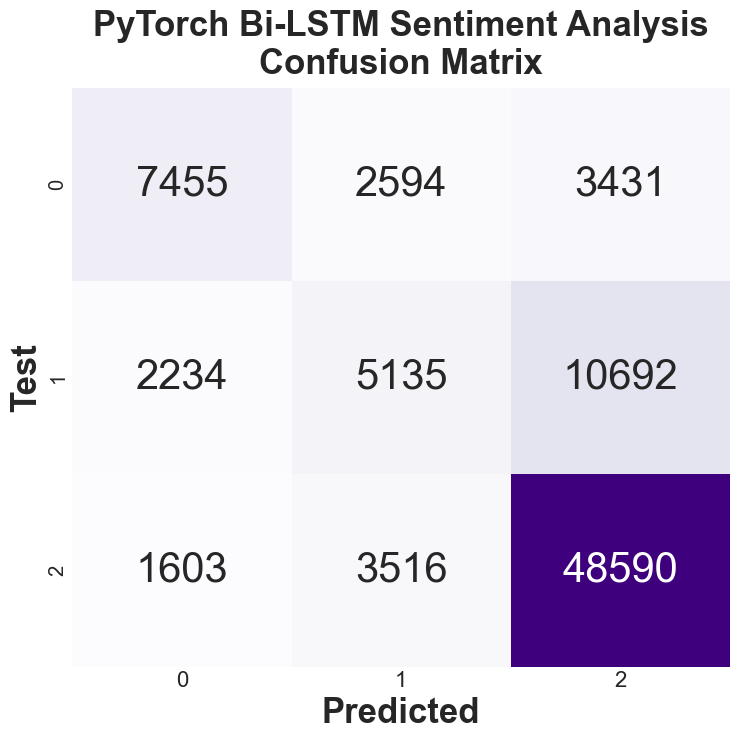

In [60]:
conf_matrix(y_test_list,y_pred_list,'PyTorch Bi-LSTM Sentiment Analysis\nConfusion Matrix', ["0","1","2"])

In [61]:
def acc(y , yHat):
    truee = 0
    for i in range(len(y)):
        if(y[i] == yHat[i]):
            truee += 1
    return (truee / len(y))

In [62]:
print(acc(y_test_list,y_pred_list))

0.7176539589442815
